# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook



# Reading and Exploration of Data

In [1]:
import pandas as pd

### What is a TSV file?
> **A TSV file is a tab-separated values file commonly used by spreadsheet applications to exchange data between databases. It stores a data table in which each record in the table is on a separate line, and data columns are separated by tabs.**

In [2]:
#read TSV data file
train_df = pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip',sep='\t')
test_df  = pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip',sep='\t')
sub_df = pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv')

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [3]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
sub_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [7]:
#shape of all data
print("train - ",train_df.shape)
print("test - ",test_df.shape)
print("Submission - ",sub_df.shape)

train -  (156060, 4)
test -  (66292, 3)
Submission -  (66292, 2)


In [8]:
print(train_df.Sentiment.value_counts(normalize=True).sort_index())

0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


<AxesSubplot:>

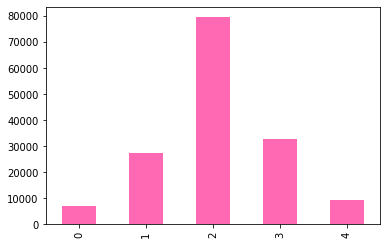

In [9]:
train_df.Sentiment.value_counts().sort_index().plot(kind='bar',color='hotpink')

<AxesSubplot:title={'center':'Pie chart of Sentiment Class'}, ylabel='Sentiment'>

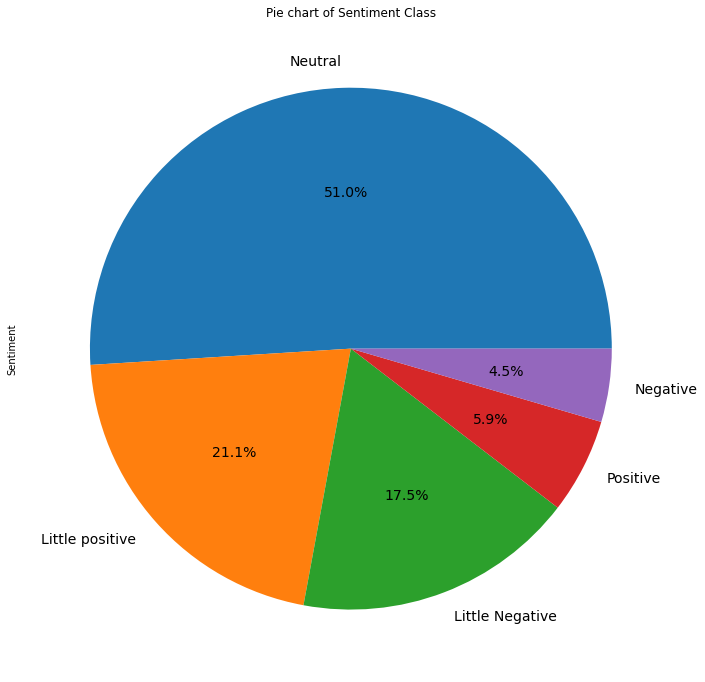

In [10]:
df2=train_df.copy(deep=True)
pie1=pd.DataFrame(df2['Sentiment'].replace(0,'Negative').replace(1,'Little Negative').replace(2,'Neutral').replace(3,'Little positive').replace(4,'Positive').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Sentiment Class',y = 'Sentiment', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

In [11]:
#this will give us some random samples of our data
train_df.Phrase.sample(10).values

array(['revelation', 'racial tension', 'undeniably intriguing film',
       'seems to be missing .', 'something',
       'its leaden acting , dull exposition and telegraphed ` surprises',
       'has a feel for the character at all stages of her life',
       'been hyped to be because it plays everything too safe',
       "'s a rather listless amble down the middle of the road , where the thematic ironies are too obvious and the sexual politics too smug",
       'the signs'], dtype=object)

In [12]:
train_df.Phrase

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

### Deep Drive in data

In [13]:
#some Phrases with 0-Sentiment
train_df[train_df.Sentiment == 0].Phrase.values[:10]

array(['would have a hard time sitting through this one',
       'have a hard time sitting through this one',
       'Aggressive self-glorification and a manipulative whitewash',
       'self-glorification and a manipulative whitewash',
       'Trouble Every Day is a plodding mess .', 'is a plodding mess',
       'plodding mess', 'could hate it for the same reason', 'hate it',
       'hate'], dtype=object)

In [14]:
#some Phrases with 1-Sentiment
train_df[train_df.Sentiment == 1].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'but none of which amounts to much of a story',
       'none of which amounts to much of a story',
       "Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
       ', I suspect , would have a hard time sitting through this one .',
       'would have a hard time sitting through this one .',
       'a hard time sitting through this one', 'a hard time', 'hard time'],
      dtype=object)

In [15]:
#some Phrases with 2-Sentiment
train_df[train_df.Sentiment == 2].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose',
       'demonstrating the adage'], dtype=object)

In [16]:
#some Phrases with 3-Sentiment
train_df[train_df.Sentiment == 3].Phrase.values[:10]

array(['good for the goose', 'good', 'amuses',
       'This quiet , introspective and entertaining independent',
       'quiet , introspective and entertaining',
       ', introspective and entertaining',
       'introspective and entertaining', 'introspective and',
       'is worth seeking .', 'fans'], dtype=object)

In [17]:
# some Phrases with 4-Sentiment
train_df[train_df.Sentiment == 4].Phrase.values[:10]

array(['This quiet , introspective and entertaining independent is worth seeking .',
       'quiet , introspective and entertaining independent',
       'entertaining', 'is worth seeking',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder',
       'thrilling',
       'A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .',
       'nearly epic',
       'rooted in a sincere performance by the title character undergoing midlife crisis .'],
      dtype=object)

In [18]:
train_df.shape,test_df.shape

((156060, 4), (66292, 3))

Summarizing insights and learnings from the dataset below:

* `Traiining Data has 156060 Rows and 4 Columns`
* `Testing Data has 66292 Rows and 3 Columns`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)




> TF-IDF (term frequency-inverse document frequency) is an information retrieval technique that helps find the most relevant documents corresponding to a given query.

> TF is a measure of how often a phrase appears in a document, and IDF is about how important that phrase is. The multiplication of these two scores makes up a TF-IDF score.

> Google has been using TF-IDF (or TF  IDF, TF*IDF, TFIDF, TF.IDF) to rank your content for a long time. It seems that Google focuses more on term frequency rather than on counting keywords. 





Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [19]:
#import required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [20]:
#setup for english language
stemmer  = SnowballStemmer(language='english')

In [21]:
#function to create tokenizer
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [22]:
# test tokenize function
tokenize("Hey how are you going")

['hey', 'how', 'are', 'you', 'go']

In [23]:
#creating stopword for engilish language
eng_stopword = stopwords.words('english')

In [24]:
#here are some english stop words
', '.join(eng_stopword[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [25]:
#select some stopwords
selected_stopwords = eng_stopword[:115]

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
#creating vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words = selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [28]:
vectorizer.fit(train_df.Phrase)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'll', 'onc', 'ourselv', 're', 'themselv', 've', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f4b40372320>)

In [29]:
len(vectorizer.vocabulary_)

2000

In [30]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '&', "'", "' `", "''", "'d", "'d expect", "'m", "'s",
       "'s -rrb-", "'s also", "'s best", "'s film", "'s go", "'s good",
       "'s hard", "'s just", "'s like", "'s movi", "'s no", "'s not",
       "'s noth", "'s perform", "'s so", "'s someth", "'s still",
       "'s too", "'s veri", "'s work", '*', '* \\', ',', ", '", ", 's",
       ', ,', ', `', ', ``', ', also', ', amus', ', becaus', ', charact',
       ', direct', ', doe', ', emot', ', especi', ', even', ', feel',
       ', film', ', funni', ', good', ', intellig', ', just', ', least',
       ', like', ', ll', ', love', ', make', ', movi', ", n't", ', never',
       ', no', ', not', ', often', ', one', ', onli', ', rather', ', re',
       ', realli', ', should', ', so', ', sometim', ', still', ', though',
       ', time', ', too', ', ultim', ', veri', ', visual', ', well',
       ', will', ', would', ', yet', '-', '- ,', '--', "-- 's", '-- ,',
       '-lrb-', '-lrb- -rrb-', '-rrb-', '-rrb- ,', '.', ". '", '. `

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [31]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [32]:
%%time
inputs = vectorizer.transform(train_df.Phrase)

CPU times: user 29.8 s, sys: 14.4 ms, total: 29.8 s
Wall time: 29.8 s


In [33]:
inputs.shape

(156060, 2000)

In [34]:
inputs.toarray()[0][:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10508068, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [35]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [36]:
%%time
test_inputs = vectorizer.transform(test_df.Phrase)

CPU times: user 11.8 s, sys: 2.91 ms, total: 11.8 s
Wall time: 11.8 s


In [37]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [38]:
#take train size to split test data from training data
TRAIN_SIZE = 100_000

In [39]:
#creating inputs and targets for train data
train_inputs = inputs[:TRAIN_SIZE]
train_targets = train_df.Sentiment[:TRAIN_SIZE]

In [40]:
#checking the shape of targets to know the data range is samem or not
train_inputs.shape,train_targets.shape

((100000, 2000), (100000,))

In [41]:
#creating inputs and targets for validation data
val_inputs = inputs[TRAIN_SIZE:]
val_targets = train_df.Sentiment[TRAIN_SIZE:]

In [42]:
#checking the shape of targets to know the data range is samem or not
val_inputs.shape,val_targets.shape

((56060, 2000), (56060,))

### Model-1 Logistic Regression Model



In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

In [45]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 6.31 s, sys: 10.2 s, total: 16.5 s
Wall time: 4.47 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [46]:
train_preds = model.predict(train_inputs)

In [47]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [48]:
train_preds

array([3, 2, 2, ..., 1, 2, 2])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
#accuracy of our prdictions
print("Accuracy Score of prediction on training data-->",accuracy_score(train_targets,train_preds))

Accuracy Score of prediction on training data--> 0.64157


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [52]:
#try with test(validation) data
val_pred_1 = model.predict(val_inputs)

In [53]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_1))

Accuracy Score of prediction on validation data--> 0.5791473421334284


In [54]:
#classificatiopn report for model predictions
from sklearn.metrics import classification_report
report = classification_report(val_targets,val_pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.39      0.10      0.16      2619
           1       0.47      0.30      0.37     10342
           2       0.63      0.85      0.72     27799
           3       0.49      0.41      0.44     11835
           4       0.52      0.16      0.25      3465

    accuracy                           0.58     56060
   macro avg       0.50      0.37      0.39     56060
weighted avg       0.55      0.58      0.54     56060



### Study Predictions on Sample Inputs

In [55]:
small_df = train_df.sample(20)

In [56]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
33905,33906,1591,worse than bland,0
112559,112560,5978,But the feelings evoked in the film are lukewa...,1
136869,136870,7402,does n't have the restraint to fully realize them,2
89994,89995,4682,before he croaks,2
87029,87030,4512,A few zingers aside,3
52184,52185,2578,"jostling against farce , thoughtful dialogue e...",1
65194,65195,3300,Dark Water is n't a complete wash -LRB- no pun...,2
98213,98214,5146,to pose Madonna,2
144322,144323,7835,in the same old story,1
82987,82988,4284,of wit and dignity,3


In [57]:
#transform small df into vectors
small_inputs = vectorizer.transform(small_df.Phrase)

In [58]:
small_preds = model.predict(small_inputs)

In [59]:
small_preds

array([1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 4, 2, 2, 2])

In [60]:
small_df.Sentiment

33905     0
112559    1
136869    2
89994     2
87029     3
52184     1
65194     2
98213     2
144322    1
82987     3
122599    3
84479     1
145160    2
86975     1
123316    1
67919     1
15154     4
134503    2
54353     1
35748     2
Name: Sentiment, dtype: int64

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [61]:
test_preds = model.predict(test_inputs)
test_preds

array([3, 2, 2, ..., 2, 2, 1])

In [62]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [63]:
sub_df.Sentiment = test_preds
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [64]:
sub_df.to_csv('submission_logisticRegression.csv',index=None)

In [65]:
sub_df.to_csv('submission.csv',index=None)

In [66]:
!head submission_logisticRegression.csv

PhraseId,Sentiment
156061,3
156062,2
156063,2
156064,2
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune 2 other types of models

### Model-2 --> Decision Trees Model

In [67]:
from sklearn import tree

In [68]:
model_2 = tree.DecisionTreeClassifier()

In [69]:
model_2.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [70]:
train_pred_2 = model_2.predict(train_inputs)

In [71]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [72]:
train_pred_2

array([1, 2, 2, ..., 3, 2, 2])

In [73]:
print("Accuracy Score of prediction on Training data-->",accuracy_score(train_targets,train_pred_2))

Accuracy Score of prediction on Training data--> 0.83039


In [74]:
#classificatiopn report for model predictions
report = classification_report(train_targets,train_pred_2)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4453
           1       0.82      0.72      0.76     16931
           2       0.82      0.94      0.87     51783
           3       0.87      0.70      0.77     21092
           4       0.95      0.68      0.79      5741

    accuracy                           0.83    100000
   macro avg       0.85      0.77      0.80    100000
weighted avg       0.84      0.83      0.83    100000



In [75]:
val_pred_2 = model_2.predict(val_inputs)
val_pred_2 

array([1, 1, 2, ..., 2, 2, 2])

In [76]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_2))

Accuracy Score of prediction on validation data--> 0.5182126293257224


In [77]:
test_preds_2 = model_2.predict(test_inputs)
test_preds_2

array([2, 2, 2, ..., 2, 2, 1])

In [78]:
sub_df.Sentiment = test_preds_2
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [79]:
sub_df.to_csv('submission_Decision_Trees.csv',index=None)

In [80]:
!head submission_Decision_Trees.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,2
156067,2
156068,2
156069,2


### Model-3 --> Naive bayes classifier

In [81]:
#split data for naive b 
from sklearn.model_selection import train_test_split
train_inputs_nb, val_inputs_nb, train_targets_nb, val_targets_nb = train_test_split(inputs, train_df['Sentiment'], test_size=0.25, random_state=5)

In [82]:
#using Naive bayes classifier for prediction
from sklearn.naive_bayes import MultinomialNB

In [83]:
model_3 = MultinomialNB()

In [84]:
model_3.fit(train_inputs_nb,train_targets_nb)

MultinomialNB()

In [85]:
train_pred_3 = model_3.predict(train_inputs_nb)

In [86]:
train_pred_3

array([2, 2, 3, ..., 2, 2, 1])

In [87]:
print("Accuracy Score of prediction on Training data-->",accuracy_score(train_targets_nb,train_pred_3))

Accuracy Score of prediction on Training data--> 0.5759408774403008


In [88]:
#classificatiopn report for model predictions
report = classification_report(train_targets_nb,train_pred_3)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.04      0.08      5298
           1       0.54      0.16      0.25     20460
           2       0.58      0.95      0.72     59684
           3       0.55      0.28      0.37     24671
           4       0.72      0.07      0.12      6932

    accuracy                           0.58    117045
   macro avg       0.60      0.30      0.31    117045
weighted avg       0.58      0.58      0.50    117045



In [89]:
val_pred_3 = model_3.predict(val_inputs_nb)
val_pred_3

array([2, 2, 2, ..., 2, 2, 2])

In [90]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets_nb,val_pred_3))

Accuracy Score of prediction on validation data--> 0.5671921056004101


In [91]:
test_pred_3 = model_3.predict(test_inputs)
test_pred_3

array([2, 2, 2, ..., 2, 2, 2])

In [92]:
sub_df.Sentiment = test_pred_3
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [93]:
sub_df.to_csv("submission_Naive_bayes_classifier.csv",index=None)

Best Model : Logistic Regression

In [94]:
print('Accuracy for Logistic Regression:'+str('{:04.2f}'.format(accuracy_score(val_targets,val_pred_1)*100))+'%')
print('Accuracy for Decision Trees Model:'+str('{:04.2f}'.format(accuracy_score(val_targets,val_pred_2)*100))+'%')
print('Accuracy for Naive bayes classifier:'+str('{:04.2f}'.format(accuracy_score(val_targets_nb,val_pred_3)*100))+'%')

Accuracy for Logistic Regression:57.91%
Accuracy for Decision Trees Model:51.82%
Accuracy for Naive bayes classifier:56.72%
